<a href="https://colab.research.google.com/github/ViniciusFebasse/UBS/blob/main/ubs's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df_ubs = pd.read_csv('ubs_localizacao.csv', sep=';')
df_ufs = pd.read_excel('ufs.xlsx')

In [5]:
df_ubs.sample(3)

,CNES,UF,IBGE,NOME,LOGRADOURO,BAIRRO,LATITUDE,LONGITUDE
10137,2380900,24,241070,CENTRO DE SAUDE JULIA DE PAIVA NOBRE,AV BOA VISTA,CENTRO,"-5,93655","-37,94874"
74,2798,28,280030,US JOSE AUGUSTO BARRETO JAPAOZINHO,AV EUCLIDES FIGUEIREDO,JAPAOZINHO,"-10,911","-37,072"
25046,5553547,31,314590,UBS PIONEIROS,AVENIDA INTENDENTE CAMARA,PIONEIROS,"-20,521","-43,692"


In [6]:
df_ubs.columns

Index(['CNES', 'UF', 'IBGE', 'NOME', 'LOGRADOURO', 'BAIRRO', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

In [7]:
colunas_ubs_excluir = ['CNES', 'IBGE']
for coluna in colunas_ubs_excluir:
  df_ubs.drop(coluna, axis=1, inplace=True)

In [8]:
df_ubs.columns

Index(['UF', 'NOME', 'LOGRADOURO', 'BAIRRO', 'LATITUDE', 'LONGITUDE'], dtype='object')

In [9]:
df_ufs.drop('nome', axis=1, inplace=True)
df_ufs.head(3)

,cod,uf
0,11,RO
1,12,AC
2,13,AM


In [10]:
df_ubs = df_ubs.join(df_ufs.set_index('cod'), on='UF')
df_ubs.drop('UF', axis=1, inplace=True)
df_ubs.sample(3)

,NOME,LOGRADOURO,BAIRRO,LATITUDE,LONGITUDE,uf
28826,UBS 05 SAMAMBAIA,QN 523 AREA ESPECIAL,SAMAMBAIA SUL,"-15,88274","-48,02279",DF
19952,UBS PIRANGI DO SUL,RUA DO COMERCIO,ZONA RURAL,"-5,98581","-35,12007",RN
31209,ESF 8 NOSSA SENHORA DA SAUDE,ZONA RURAL,ZONA RURAL,"-9,74799","-37,43574",AL


In [11]:
df_ubs.columns = ['nome', 'logradouro', 'bairro', 'latitude', 'longitude', 'uf']
df_ubs.sample(3)

,nome,logradouro,bairro,latitude,longitude,uf
41478,ESF CENTRO,RUA JOAQUINA VARGAS,CENTRO,"-29,54602","-49,89064",RS
11683,UNIDADE ESF NOROESTE,RUA 21 C 202A,SETOR AEROPORTO,"-17,732","-49,101",GO
25750,UNIDADE SAUDE DA FAMILIA HILDA DA SILVA OLIVEIRA,RUA JOSE DE LIMA,DE LOUDES,"-19,69052","-51,17543",MS


In [12]:
reindexacao = ['nome', 'uf', 'logradouro', 'bairro', 'latitude', 'longitude',]

In [13]:
df_ubs = df_ubs.reindex(columns=reindexacao)
df_ubs.sample(3)

,nome,uf,logradouro,bairro,latitude,longitude
38899,JUATUBA UBS DE VILA MARIA REGINA,MG,ALAMEDA DOS PINHEIROS,VILA MARIA REGINA,"-19,952","-44,343"
12179,UNIDADE BASICA DE SAUDE DO MOJO,MA,POVOADO MOJO,CENTRO,"-2,449","-44,783"
29364,USF VIII FUTEBOL,PB,RUA DO FUTEBOL,BAIRRO FUTEBOL,"-7,28823","-35,60158"


In [14]:
f"Existem hoje no Distrito Federal {df_ubs.nome[df_ubs.uf == 'DF'].count()} Unidades Básicas de Saúde"

'Existem hoje no Distrito Federal 203 Unidades Básicas de Saúde'

In [15]:
estados = list(df_ubs.uf.unique())
estados

['GO',
 'PE',
 'BA',
 'PR',
 'MG',
 'SE',
 'SP',
 'ES',
 'MA',
 'PA',
 'MS',
 'DF',
 'RJ',
 'RS',
 'SC',
 'PB',
 'RN',
 'CE',
 'AL',
 'MT',
 'AC',
 'TO',
 'RR',
 'AM',
 'PI',
 'RO',
 'AP']

In [16]:
for estado in estados:
  print(f"Existem hoje no {estado} {df_ubs.nome[df_ubs.uf == estado].count()} Unidades Básicas de Saúde")

Existem hoje no GO 1434 Unidades Básicas de Saúde
Existem hoje no PE 2590 Unidades Básicas de Saúde
Existem hoje no BA 3960 Unidades Básicas de Saúde
Existem hoje no PR 2115 Unidades Básicas de Saúde
Existem hoje no MG 5595 Unidades Básicas de Saúde
Existem hoje no SE 519 Unidades Básicas de Saúde
Existem hoje no SP 5383 Unidades Básicas de Saúde
Existem hoje no ES 882 Unidades Básicas de Saúde
Existem hoje no MA 2050 Unidades Básicas de Saúde
Existem hoje no PA 1570 Unidades Básicas de Saúde
Existem hoje no MS 652 Unidades Básicas de Saúde
Existem hoje no DF 203 Unidades Básicas de Saúde
Existem hoje no RJ 1992 Unidades Básicas de Saúde
Existem hoje no RS 2117 Unidades Básicas de Saúde
Existem hoje no SC 1779 Unidades Básicas de Saúde
Existem hoje no PB 1528 Unidades Básicas de Saúde
Existem hoje no RN 1018 Unidades Básicas de Saúde
Existem hoje no CE 2205 Unidades Básicas de Saúde
Existem hoje no AL 911 Unidades Básicas de Saúde
Existem hoje no MT 940 Unidades Básicas de Saúde
Existe

In [17]:
# Insira o nome de uma coluna no final do groupby para que os dados sejam agrupados somente por ela
serie_ubs_por_estado = df_ubs.groupby('uf').count().nome.sort_values(ascending=False)
serie_ubs_por_estado

uf
MG    5595
SP    5383
BA    3960
PE    2590
CE    2205
RS    2117
PR    2115
MA    2050
RJ    1992
SC    1779
PA    1570
PB    1528
GO    1434
PI    1102
RN    1018
MT     940
AL     911
ES     882
MS     652
AM     597
SE     519
TO     433
RO     292
AC     252
DF     203
RR     138
AP     132
Name: nome, dtype: int64

In [18]:
df_ubs_x_estado = pd.DataFrame(serie_ubs_por_estado).reset_index()
df_ubs_x_estado.sample(2)

,uf,nome
22,RO,292
1,SP,5383


<BarContainer object of 27 artists>

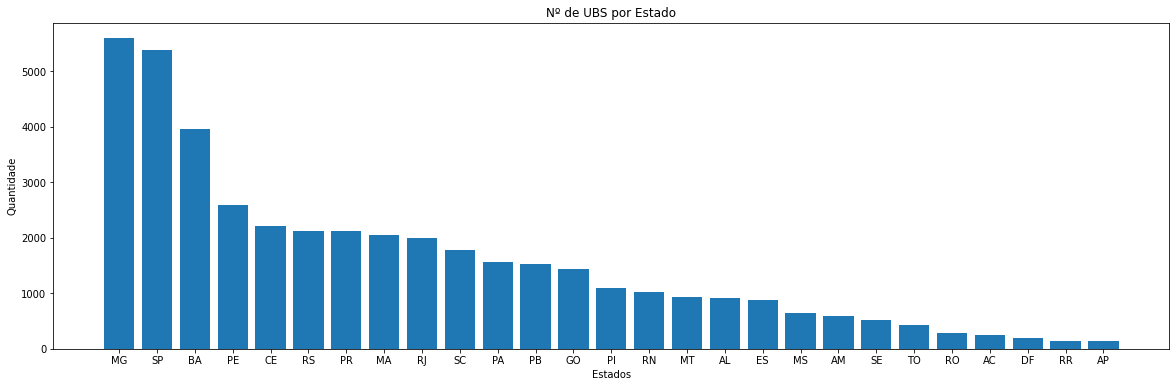

In [19]:
plt.figure(figsize=(20, 6))
plt.title('Nº de UBS por Estado')
plt.xlabel('Estados')
plt.ylabel('Quantidade')
plt.bar(x= df_ubs_x_estado.uf, height= df_ubs_x_estado.nome)

In [20]:
df_ubs.latitude = df_ubs.latitude.replace(np.nan, 0)
df_ubs.longitude = df_ubs.longitude.replace(np.nan, 0)

In [21]:
df_ubs.latitude = df_ubs.latitude.astype('str')
df_ubs.longitude = df_ubs.longitude.astype('str')

In [22]:
para_float = lambda x: x.replace(",", ".")

In [23]:
df_ubs.latitude = df_ubs.latitude.apply(para_float)
df_ubs.longitude = df_ubs.longitude.apply(para_float)

In [24]:
df_ubs.latitude = df_ubs.latitude.astype('float16')
df_ubs.longitude = df_ubs.longitude.astype('float16')

In [25]:
df_ubs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42389 entries, 0 to 42388
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nome        42389 non-null  object 
 1   uf          42389 non-null  object 
 2   logradouro  42389 non-null  object 
 3   bairro      42389 non-null  object 
 4   latitude    42389 non-null  float16
 5   longitude   42389 non-null  float16
dtypes: float16(2), object(4)
memory usage: 1.5+ MB


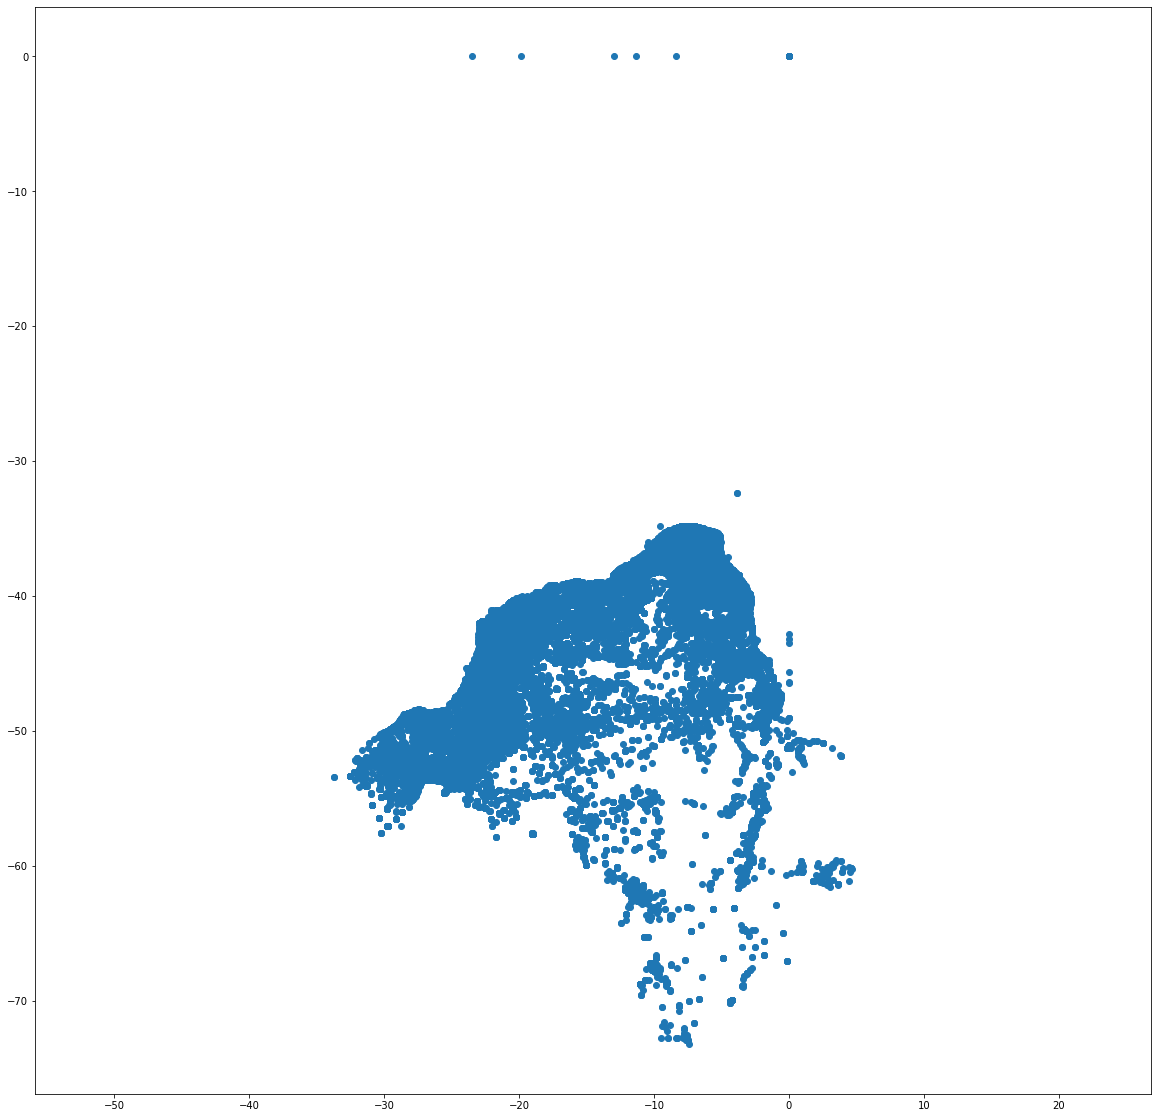

In [26]:
plt.figure(figsize=(20, 20))
plt.axis('equal')
plt.scatter(df_ubs.latitude, df_ubs.longitude)

In [45]:
pd.options.display.width = 0
renda = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_renda_per_capita', attrs={'class': 'wikitable'}, skiprows=2)
#df_renda = pd.DataFrame(renda)
renda

[     1  (0)     Distrito Federal    2.475    2.685
      2  (0)            São Paulo    1.814    1.945
 0    3  (1)    Rio Grande do Sul    1.759    1.842
 1    4  (1)       Rio de Janeiro    1.723    1.881
 2    5  (0)       Santa Catarina    1.632    1.769
 3    6  (0)               Paraná    1.508    1.620
 4    7  (0)   Mato Grosso do Sul    1.488    1.514
 5    8  (1)          Mato Grosso    1.401    1.402
 6    9  (1)       Espírito Santo    1.347    1.476
 7   10  (0)         Minas Gerais    1.314    1.357
 8   11  (0)                Goiás    1.258    1.306
 9   12  (0)             Rondônia    1.169    1.136
 10  13  (0)  Rio Grande do Norte    1.077    1.056
 11  14  (0)            Tocantins    1.060    1.055
 12  15  (3)                Ceará    1.028  942.000
 13  16  (0)              Sergipe    1.028  979.000
 14  17  (2)              Roraima  983.000    1.043
 15  18  (2)                Bahia  965.000  912.000
 16  19  (2)                 Acre  917.000  889.000
 17  20  (3)